In [1]:
import pandas as pd
import numpy as np
import glob, os
import math

In [2]:
def read_documents():
    documents = {}
    
    for file in glob.glob("/home/stephan/TDWI/Artikel/*.txt"):

        filename = open(file, "r", encoding='cp1252')
        text = str(filename.readlines())

        path = os.path.basename(file)
        extension = os.path.splitext(file)[1]
        filename, extension = path.split('.')

        documents[filename] = text
            
    return(documents)

In [3]:
def tokenizer(documents):
    tokenized = {}
    
    for doc in documents:
        
        document = documents.get(doc)
        punctuations = ['(',')',';',':','[',']','{','}',',','.','-','``',"''",'!','\"','§','$','%','&','?','@','+','–','~','*','#','\'','\\n','\\','„','“']
        cleaned = []

        token = document.split(' ')

        for t in token:
            temp = t
            for p in punctuations:
                if p in t:
                    temp = temp.replace(p, '')
            cleaned.append(temp.lower())
            
        tokenized[doc] = cleaned

    return(tokenized)

In [4]:
def stopwords(tokenized):
    stopwords = ["ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","ander","andere","anderem","anderen","anderer","anderes","anderm","andern","anderr","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deinen","deiner","deines","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derer","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einig","einige","einigem","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","eurem","euren","eurer","eures","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","hab","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","keines","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unse","unsem","unsen","unser","unsere","unserer","unses","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","warst","wart","warum","was","weg","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","woher","wohin","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"]
    
    removed = {}
    
    for doc in tokenized:
        document = tokenized.get(doc)
        no_stopwords = [token for token in document if not token in stopwords]
        
        removed[doc] = no_stopwords
    
    return(removed)

In [5]:
def get_vocabulary(documents):
    vocabulary = set()

    for key in removed:
        text = removed.get(key)
        vocabulary = vocabulary.union(text)
    
    return(vocabulary)

In [6]:
def bag_of_words(documents, vocabulary):
    bow = {}
    
    for key in documents:
        document = documents.get(key)
        dictTemp = dict.fromkeys(vocabulary, 0)

        for token in document:
            dictTemp[token]+=1
        
        bow[key] = dictTemp
    
    bowDF = pd.DataFrame(bow).T
        
    return(bow, bowDF)

In [7]:
def term_frequency(bow, documents):
    tfDict= {}
    
    for key in documents:
        tfCount = {}
        doc = documents.get(key)
        wordCount = len(doc)
        for word, count in bow.get(key).items():
            tfCount[word] = count / float(wordCount)
            
        tfDict[key] = tfCount
        
    tfDF = pd.DataFrame(tfDict).T
        
    return(tfDict, tfDF)

In [8]:
def inverse_document_frequency(bow):
    idfDict = {}
    N = len(bow)
    idfDict = dict.fromkeys(bow[next(iter(bow))].keys(),0)
    i = 0
    for key in bow:
        doc = bow.get(key)
        for word, val in doc.items():
            if val > 0:
                idfDict[word] +=1
        i = i + 1
    for word, val in idfDict.items():
        idfDict[word]= math.log(N / float(val))
    
    return(idfDict)

In [9]:
def term_frequency_inverse_document_frequency(tfBow, idfs):
    tfidf = {}
    tfidfDict = {}
    for key in tfBow:
        text = tfBow.get(key)
        tfidf = {}
        for word, val in text.items():
            tfidf[word] = val * idfs[word]
        tfidfDict[key] = tfidf
    
    tfidfDF = pd.DataFrame(tfidfDict).T
    
    return(tfidfDict, tfidfDF)

In [40]:
corpus = read_documents()
token = tokenizer(corpus)
removed = stopwords(token)
vocabulary = get_vocabulary(removed)
bow, bowDF = bag_of_words(removed, vocabulary)
tf, tfDF = term_frequency(bow, removed)
idf = inverse_document_frequency(bow)
tfidf, tfidfDF = term_frequency_inverse_document_frequency(bow, idf)

In [41]:
tfidfDF.values

array([[0.        , 3.21887582, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.83258146, ..., 0.        , 0.        ,
        0.        ]])

In [134]:
import numpy as np
from scipy import sparse

class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data.values[i]
            print(data.values[i])
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                
            for featureset in data.values:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                pass
                #self.centorids[classification] = np.average(self.classifications[classification],axis=0)
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
                    
            if optimized:
                break
                
    def predict(self, data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        
clf = K_Means()
clf.fit(tfidfDF)
x = clf.classifications
print(len(x))

[0.         3.21887582 0.         ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.         ... 3.21887582 0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
5


(array([   1,   14,   41,   70,   89,  135,  155,  182,  426,  459,  557,
        682,  795,  833,  859,  897,  915, 1012, 1025, 1041, 1042, 1043,
       1051, 1074, 1217, 1246, 1256, 1422, 1484, 1535, 1555, 1556, 1605,
       1616, 1725, 1817, 2023, 2192, 2198, 2404, 2426, 2454, 2466, 2533,
       2536, 2638, 2655, 2739, 2783, 2836, 2838, 2891, 2924, 2939, 2959,
       2960, 3042, 3083, 3185, 3199, 3223, 3250, 3281, 3334, 3406, 3416,
       3425, 3487, 3519, 3520, 3532, 3534, 3556, 3640, 3693, 3794, 3814,
       3822, 3823, 3906, 3957, 4211, 4355, 4501, 4532]),)
(array([   2,    6,   53,   54,  122,  172,  183,  208,  307,  323,  414,
        456,  457,  501,  537,  556,  601,  643,  646,  668,  680,  706,
        722,  728,  729,  755,  799,  895,  904,  937,  940,  963, 1003,
       1006, 1020, 1023, 1031, 1047, 1048, 1050, 1107, 1110, 1121, 1129,
       1147, 1167, 1225, 1266, 1279, 1281, 1292, 1309, 1342, 1372, 1461,
       1463, 1466, 1589, 1618, 1637, 1707, 1728, 1741, 1745, 177

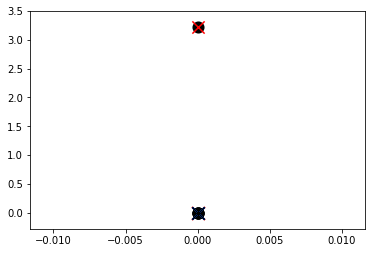

In [98]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k', s=50, linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        #featureset = sparse.csr_matrix(featureset)
        print(np.nonzero(featureset))
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150, linewidths=5)

plt.show()

In [11]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)
            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [12]:
import matplotlib.pyplot as plt, mpld3
from matplotlib import style

X = tfidfDF.values
    
km = K_Means(5)
blub = km.fit(X)
km.centroids

colors = 10*["r", "g", "c", "b", "k"]

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 300, marker = "x")

for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)
        
mpld3.display()